In [53]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [79]:
image = cv2.imread('characters.png',0)
N , N = image.shape
N

512

In [80]:
m = np.array([np.linspace(0, N-1, N)])                                    # Create an array of length M having separation of index a
n = m.T
indexed = m*n
indexed

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 5.09000e+02,
        5.10000e+02, 5.11000e+02],
       [0.00000e+00, 2.00000e+00, 4.00000e+00, ..., 1.01800e+03,
        1.02000e+03, 1.02200e+03],
       ...,
       [0.00000e+00, 5.09000e+02, 1.01800e+03, ..., 2.59081e+05,
        2.59590e+05, 2.60099e+05],
       [0.00000e+00, 5.10000e+02, 1.02000e+03, ..., 2.59590e+05,
        2.60100e+05, 2.60610e+05],
       [0.00000e+00, 5.11000e+02, 1.02200e+03, ..., 2.60099e+05,
        2.60610e+05, 2.61121e+05]])

In [81]:
A = np.round(np.exp((-1j*2*np.pi*indexed)/N))
AT = np.ndarray.conjugate(A)
AT

array([[1.-0.j, 1.-0.j, 1.-0.j, ..., 1.-0.j, 1.-0.j, 1.-0.j],
       [1.-0.j, 1.+0.j, 1.+0.j, ..., 1.-0.j, 1.-0.j, 1.-0.j],
       [1.-0.j, 1.+0.j, 1.+0.j, ..., 1.-0.j, 1.-0.j, 1.-0.j],
       ...,
       [1.-0.j, 1.-0.j, 1.-0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
       [1.-0.j, 1.-0.j, 1.-0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
       [1.-0.j, 1.-0.j, 1.-0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j]])

In [82]:
out = np.dot(AT, image)
out

array([[117248.+0.j, 117248.+0.j, 117248.+0.j, ..., 117248.+0.j,
        117248.+0.j, 117248.+0.j],
       [     0.+0.j,      0.+0.j,      0.+0.j, ...,      0.+0.j,
             0.+0.j,      0.+0.j],
       [     0.-0.j,      0.-0.j,      0.-0.j, ...,      0.-0.j,
             0.-0.j,      0.-0.j],
       ...,
       [     0.-0.j,      0.-0.j,      0.-0.j, ...,      0.-0.j,
             0.-0.j,      0.-0.j],
       [     0.-0.j,      0.-0.j,      0.-0.j, ...,      0.-0.j,
             0.-0.j,      0.-0.j],
       [     0.+0.j,      0.+0.j,      0.+0.j, ...,      0.+0.j,
             0.+0.j,      0.+0.j]])

In [87]:
out1 = np.dot(out, A)
#out1 = np.ndarray.conjugate(out1)
#out2 = out1.T


In [88]:
dftmtx = np.fft.fft2(image)

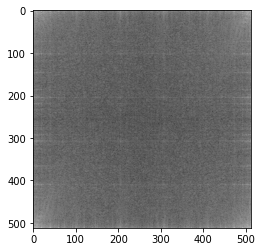

In [89]:
plt.imshow(np.log(1 + np.abs(out1)), cmap='gray')

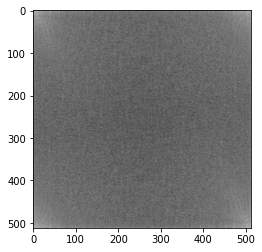

In [90]:
plt.imshow(np.log(1 + np.abs(dftmtx)), cmap='gray')

In [4]:
def twoD_DFT(N, image):
    #image = cv2.resize(image, (512, 512))
    m = np.array([np.linspace(0, N-1, N)])                                    # Create an array of length M having separation of index a
    n = m.T
    indexed_matrix = m*n
    twiddle = np.round(np.exp((-1j*2*np.pi*indexed_matrix)/N))
    twiddle_hermitian = np.ndarray.conjugate(twiddle)
    
    output = (np.dot(twiddle_hermitian, image, twiddle).T)

    return output


In [11]:
image = np.array([[1,2,3,4,5,6],
[11,23,4,5,6,0],
[1,2,3,4,5,6],
[1,2,3,14,5,26],
[0,2,3,4,5,6],
[1,2,3,4,5,60]
])

In [12]:
# = cv2.imread('Images\dynamicSine.png', 0)
M, N = image.shape

In [15]:
dft_image = twoD_DFT(N, image)
df = np.fft.fft2(image)
dft_image, df

(array([[ 15. +0.j,  11.+11.j,   0. +9.j, -11. +0.j,  -9. -9.j,   0.-11.j],
        [ 33. +0.j,  21.+21.j,   0.+21.j, -21. +0.j, -21.-21.j,   0.-21.j],
        [ 19. +0.j,   1. +1.j,   0. +1.j,  -1. +0.j,  -1. -1.j,   0. -1.j],
        [ 35. +0.j,  -9. +1.j,  10. +1.j, -11. +0.j,   9. -1.j, -10. -1.j],
        [ 31. +0.j,   1. +1.j,   0. +1.j,  -1. +0.j,  -1. -1.j,   0. -1.j],
        [104. +0.j, -26.-60.j, -34.-60.j, -68. +0.j,  26.+60.j,  34.+60.j]]),
 array([[ 237. +0.00000000e+00j,   23.5+7.18801085e+01j,
          -43.5+5.10954988e+01j, -107. -1.33226763e-15j,
          -43.5-5.10954988e+01j,   23.5-7.18801085e+01j],
        [  11.5+2.16506351e+01j,  -39. +3.46410162e+00j,
          -72.5-3.20429399e+01j,    1.5-4.41672956e+01j,
           49. -2.07846097e+01j,   82.5+1.47224319e+01j],
        [ -10.5+2.33826859e+01j,  -81.5+1.64544827e+01j,
          -48. -1.90525589e+01j,   -0.5-4.24352448e+01j,
           73.5-3.03108891e+01j,   40. +5.19615242e+00j],
        [-113. +0.00000000

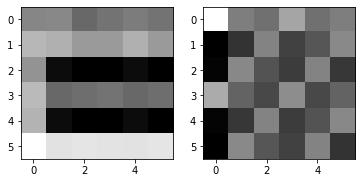

In [13]:



dft_image = twoD_DFT(N, image)
plt.subplot(1,2,1)
plt.imshow(np.log(1 + np.abs(dft_image)), cmap='gray')
df = np.fft.fft2(image)
plt.subplot(1,2,2)
plt.imshow(np.log(1+ abs(df)), cmap='gray')
plt.show()

In [7]:
m,n =3,3
import numpy as np
m = np.arange(m)                                                         # For patch indexing , I(m, n)
n = np.arange(n)

In [8]:
[I, J] = np.meshgrid(m, n, indexing='ij')

In [10]:
I, J

(array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]]),
 array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]))

In [2]:
import numpy as np
M = 3

In [3]:
m = np.array([np.linspace(0, M-1, M)])  

In [4]:
n = m.T

In [5]:
m, n

(array([[0., 1., 2.]]),
 array([[0.],
        [1.],
        [2.]]))

In [6]:
m+n

array([[0., 1., 2.],
       [1., 2., 3.],
       [2., 3., 4.]])